# EDA (Exploratory Data Analysis)

In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# loading data
df = pd.read_csv('J2.csv')
pd.DataFrame(df)

,Indikator,Tipe
0,hal yang pertama saya lakukan ialah menanyakan...,F
1,tidak peduli,T
2,Mengambil alih tugasnya,F
3,Menegurnya karena di juga kan ga dibuat sengaja,F
4,"menegur, jika memang tetap tidak bisa, dengan ...",T
...,...,...
101,membantunya ketika ada tugas yang susah,F
102,"Menegurnya, karena itu sudah menjadi tugasnya ...",T
103,"menegurnya, karena menurut saya itu tugas kelo...",F
104,menegurnya dan memberikan tugas lain yang seki...,F


In [ ]:
#  memeriksa missing value
df.isnull().sum()

Indikator    0
Tipe         0
dtype: int64

In [ ]:
df.describe(include=['object'])

,Indikator,Tipe
count,106,106
unique,99,2
top,Menegurnya,F
freq,7,60


In [ ]:
total = df.groupby(['Tipe']).count()
total

,Indikator
Tipe,
F,60
T,46


In [ ]:
#Mencari kata terumum pada kolom indikator
from collections import Counter

words = list(df["Indikator"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(100)

[('saya', 72),
 ('akan', 67),
 ('tidak', 52),
 ('dan', 50),
 ('alih', 46),
 ('menegurnya', 41),
 ('tugasnya', 38),
 ('mengambil', 35),
 ('yang', 30),
 ('tugas', 26),
 ('jika', 26),
 ('dengan', 25),
 ('Menegurnya', 20),
 ('karena', 18),
 ('maka', 17),
 ('teman', 15),
 ('kelompok', 15),
 ('tersebut', 15),
 ('Saya', 14),
 ('nya', 14),
 ('dia', 13),
 ('mengerjakan', 12),
 ('bisa', 11),
 ('agar', 11),
 ('itu', 11),
 ('menegur', 10),
 ('untuk', 10),
 ('lebih', 9),
 ('tetap', 9),
 ('dari', 8),
 ('ia', 8),
 ('ada', 8),
 ('ambil', 8),
 ('kerja', 7),
 ('memberi', 7),
 ('dalam', 7),
 ('baik', 6),
 ('di', 6),
 ('kita', 6),
 ('apabila', 6),
 ('dapat', 6),
 ('dahulu', 6),
 ('tetapi', 6),
 ('cepat', 6),
 ('selesai', 6),
 ('tugasnya,', 6),
 ('tapi', 5),
 ('nilai', 5),
 ('membantunya', 5),
 ('cara', 5),
 ('terlebih', 5),
 ('mau', 5),
 ('sudah', 5),
 ('ke', 5),
 ('diberikan', 4),
 ('atau', 4),
 ('mungkin', 4),
 ('menyelesaikan', 4),
 ('Mengambil', 4),
 ('guru', 4),
 ('bersama', 4),
 ('Menegur', 4),
 ('m

#Data Pre-processing

1. Case Folding
2. Data Cleansing
- Case folding
- Stripping
- Remove emoji
- Remove number
- Remove character
- Remove punctiation
- Remove single char
3. Tokenizing
4. Normalization
5. Filtering
6. Stemming

In [ ]:
# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
df['Indikator'] = df['Indikator'].str.lower()
pd.DataFrame(df['Indikator'])

,Indikator
0,hal yang pertama saya lakukan ialah menanyakan...
1,tidak peduli
2,mengambil alih tugasnya
3,menegurnya karena di juga kan ga dibuat sengaja
4,"menegur, jika memang tetap tidak bisa, dengan ..."
...,...
101,membantunya ketika ada tugas yang susah
102,"menegurnya, karena itu sudah menjadi tugasnya ..."
103,"menegurnya, karena menurut saya itu tugas kelo..."
104,menegurnya dan memberikan tugas lain yang seki...


In [ ]:
# data cleansing
from IPython.utils import text
import string
import re #regex library

# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def data_clean(indikator) :
  #remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  #remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  #remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  #remove number
  indikator = re.sub(r"\d+", "", indikator)
  #remove punctuation
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  #remove whitespace leading & trailing
  indikator =  indikator.strip()
  #remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  #remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator
df['Indikator_clean'] = df['Indikator'].apply(data_clean)
  #NLTK word tokenize
def word_tokenize_wrapper(indikator) :
  return word_tokenize(indikator)

df['Indikator_tokens'] = df['Indikator_clean'].apply(word_tokenize_wrapper)

pd.DataFrame(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Indikator,Tipe,Indikator_clean,Indikator_tokens
0,hal yang pertama saya lakukan ialah menanyakan...,F,hal yang pertama saya lakukan ialah menanyakan...,"[hal, yang, pertama, saya, lakukan, ialah, men..."
1,tidak peduli,T,tidak peduli,"[tidak, peduli]"
2,mengambil alih tugasnya,F,mengambil alih tugasnya,"[mengambil, alih, tugasnya]"
3,menegurnya karena di juga kan ga dibuat sengaja,F,menegurnya karena di juga kan ga dibuat sengaja,"[menegurnya, karena, di, juga, kan, ga, dibuat..."
4,"menegur, jika memang tetap tidak bisa, dengan ...",T,menegur jika memang tetap tidak bisa dengan te...,"[menegur, jika, memang, tetap, tidak, bisa, de..."
...,...,...,...,...
101,membantunya ketika ada tugas yang susah,F,membantunya ketika ada tugas yang susah,"[membantunya, ketika, ada, tugas, yang, susah]"
102,"menegurnya, karena itu sudah menjadi tugasnya ...",T,menegurnya karena itu sudah menjadi tugasnya d...,"[menegurnya, karena, itu, sudah, menjadi, tuga..."
103,"menegurnya, karena menurut saya itu tugas kelo...",F,menegurnya karena menurut saya itu tugas kelom...,"[menegurnya, karena, menurut, saya, itu, tugas..."
104,menegurnya dan memberikan tugas lain yang seki...,F,menegurnya dan memberikan tugas lain yang seki...,"[menegurnya, dan, memberikan, tugas, lain, yan..."


In [ ]:
normalizad_word = pd.read_csv("normalisasi1.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['Indikator_normalized'] = df['Indikator_tokens'].apply(normalized_term)

df['Indikator_normalized'].head()

0    [hal, yang, pertama, saya, lakukan, ialah, men...
1                                      [tidak, peduli]
2                          [mengambil, alih, tugasnya]
3    [menegurnya, karena, di, juga, kan, tidak, dib...
4    [menegur, jika, memang, tetap, tidak, bisa, de...
Name: Indikator_normalized, dtype: object

In [ ]:
# # filtering
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


# def stopword_removal (indikator):
#   filtering = stopwords.words('indonesian','english')
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
# df['indikator_filter'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membuat list stopword sesuai kebutuhan fitur berdasarkan most uninformative words
'''
Ketika ada PR yang harus diselesaikan malam ini, Tiba-tiba teman lamamu mengajak
kamu untuk bertemu (reuni,bermain, ngobrol). Bagaimana cara kamu menyikapinya? , ceritakan alasannya!
'''
stop_list = ["saya","akan","yang","dengan","jika"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

df['indikator_filter'] = df['Indikator_normalized'].apply(stopword_removal)
df['indikator_filter']

0      [hal, pertama, lakukan, ialah, menanyakan, tem...
1                                        [tidak, peduli]
2                            [mengambil, alih, tugasnya]
3      [menegurnya, karena, di, juga, kan, tidak, dib...
4      [menegur, memang, tetap, tidak, bisa, terpaksa...
                             ...                        
101             [membantunya, ketika, ada, tugas, susah]
102    [menegurnya, karena, itu, sudah, menjadi, tuga...
103    [menegurnya, karena, menurut, itu, tugas, kelo...
104    [menegurnya, dan, memberikan, tugas, lain, sek...
105    [menegurnya, dan, menyuruhnya, untuk, mengerja...
Name: indikator_filter, Length: 106, dtype: object

In [ ]:
# Stemming

!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

df['indikator_stemming'] = df['indikator_filter'].apply(stemming)

hal pertama laku ialah tanya teman apakah sanggup terima tugas beri atau tidak tidak bisa mungkin lebih baik beri tugas atau tukar tugas teman lain bisa selesai tugas apa beri
tidak peduli
ambil alih tugas
tegur karena di juga kan tidak buat sengaja
tegur memang tetap tidak bisa paksa ambil alih tugas
ambil alih tugas dan tegur bukti hasil kerja
usaha tegur tetapi kalau masih tetap sama ambil alih
bagi rata semua tugas kelompok beri guru kepada kita agar nilai kelompok ini asli dari hasil kerja keras kita sama
ambil alih tugas
tegur baik
tegur
tegur
ambil alih tugas karena tidak suka drama panjang
tegur dan suruh kerja
pertama tegur dan tentu beri tahu mana titik salah ia buat telah itu bantu kerja tugas
dahulu cara keluarga yaitu tegur begitu tidak jadi konflik tidak perlu namun apabila rasa tidak ada itikad baik maka ambil alih tugas
tegur nya untuk laku tanggung jawab telah beri agar tidak dapat enak saja
tegur
mungkin awal bisa tegur lebih dahulu tetapi kalau dia tetap tidak mau ke

In [ ]:
#tokenize data stemming

 #NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

df['indikator_stemmed_tokens'] = df['indikator_stemming'].apply(stemmed_tokenizing)


In [ ]:
pd.DataFrame(df[['Indikator_normalized', 'indikator_filter', 'indikator_stemmed_tokens']])

,Indikator_normalized,indikator_filter,indikator_stemmed_tokens
0,"[hal, yang, pertama, saya, lakukan, ialah, men...","[hal, pertama, lakukan, ialah, menanyakan, tem...","[hal, pertama, laku, ialah, tanya, teman, apak..."
1,"[tidak, peduli]","[tidak, peduli]","[tidak, peduli]"
2,"[mengambil, alih, tugasnya]","[mengambil, alih, tugasnya]","[ambil, alih, tugas]"
3,"[menegurnya, karena, di, juga, kan, tidak, dib...","[menegurnya, karena, di, juga, kan, tidak, dib...","[tegur, karena, di, juga, kan, tidak, buat, se..."
4,"[menegur, jika, memang, tetap, tidak, bisa, de...","[menegur, memang, tetap, tidak, bisa, terpaksa...","[tegur, memang, tetap, tidak, bisa, paksa, amb..."
...,...,...,...
101,"[membantunya, ketika, ada, tugas, yang, susah]","[membantunya, ketika, ada, tugas, susah]","[bantu, ketika, ada, tugas, susah]"
102,"[menegurnya, karena, itu, sudah, menjadi, tuga...","[menegurnya, karena, itu, sudah, menjadi, tuga...","[tegur, karena, itu, sudah, jadi, tugas, dan, ..."
103,"[menegurnya, karena, menurut, saya, itu, tugas...","[menegurnya, karena, menurut, itu, tugas, kelo...","[tegur, karena, turut, itu, tugas, kelompok, m..."
104,"[menegurnya, dan, memberikan, tugas, lain, yan...","[menegurnya, dan, memberikan, tugas, lain, sek...","[tegur, dan, beri, tugas, lain, sekira, dia, m..."


In [ ]:
df.head()

,Indikator,Tipe,Indikator_clean,Indikator_tokens,Indikator_normalized,indikator_filter,indikator_stemming,indikator_stemmed_tokens
0,hal yang pertama saya lakukan ialah menanyakan...,F,hal yang pertama saya lakukan ialah menanyakan...,"[hal, yang, pertama, saya, lakukan, ialah, men...","[hal, yang, pertama, saya, lakukan, ialah, men...","[hal, pertama, lakukan, ialah, menanyakan, tem...",hal pertama laku ialah tanya teman apakah sang...,"[hal, pertama, laku, ialah, tanya, teman, apak..."
1,tidak peduli,T,tidak peduli,"[tidak, peduli]","[tidak, peduli]","[tidak, peduli]",tidak peduli,"[tidak, peduli]"
2,mengambil alih tugasnya,F,mengambil alih tugasnya,"[mengambil, alih, tugasnya]","[mengambil, alih, tugasnya]","[mengambil, alih, tugasnya]",ambil alih tugas,"[ambil, alih, tugas]"
3,menegurnya karena di juga kan ga dibuat sengaja,F,menegurnya karena di juga kan ga dibuat sengaja,"[menegurnya, karena, di, juga, kan, ga, dibuat...","[menegurnya, karena, di, juga, kan, tidak, dib...","[menegurnya, karena, di, juga, kan, tidak, dib...",tegur karena di juga kan tidak buat sengaja,"[tegur, karena, di, juga, kan, tidak, buat, se..."
4,"menegur, jika memang tetap tidak bisa, dengan ...",T,menegur jika memang tetap tidak bisa dengan te...,"[menegur, jika, memang, tetap, tidak, bisa, de...","[menegur, jika, memang, tetap, tidak, bisa, de...","[menegur, memang, tetap, tidak, bisa, terpaksa...",tegur memang tetap tidak bisa paksa ambil alih...,"[tegur, memang, tetap, tidak, bisa, paksa, amb..."


# Feature extraction

In [ ]:
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
data_clean = df.astype({'Tipe' : 'category'})
data_clean = df.astype({'indikator_stemmed_tokens' : 'string'})
data_clean.dtypes

Indikator                           object
Tipe                                object
Indikator_clean                     object
Indikator_tokens                    object
Indikator_normalized                object
indikator_filter                    object
indikator_stemming                  object
indikator_stemmed_tokens    string[python]
dtype: object

In [ ]:
#  memeriksa missing value
df.isnull().any()

Indikator                   False
Tipe                        False
Indikator_clean             False
Indikator_tokens            False
Indikator_normalized        False
indikator_filter            False
indikator_stemming          False
indikator_stemmed_tokens    False
dtype: bool

In [ ]:
# Missing value handling

for idx in data_clean.index:
 if(len(data_clean["indikator_stemming"][idx]) == 0):
  data_clean = data_clean.drop(index=idx)

In [ ]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan pembobotan TF-IDF pada kolom "indikator"
X = tfidf_vectorizer.fit_transform(data_clean['indikator_stemmed_tokens'])


In [ ]:
len(data_clean)

106

In [ ]:
# encoding label
enc = LabelEncoder()
data_clean['type of encoding'] = enc.fit_transform(data_clean['Tipe'])

y = data_clean['type of encoding']

# Splitting Data

In [ ]:
# Splitting data package
from sklearn.model_selection import train_test_split

In [ ]:
if X.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [ ]:
pd.DataFrame(X,y)

,0
type of encoding,
0,"(0, 13)\t0.19631517914536661\n (0, 205)\t0...."
1,"(0, 172)\t0.9274593835615057\n (0, 246)\t0...."
0,"(0, 7)\t0.6103115006107325\n (0, 9)\t0.5960..."
0,"(0, 209)\t0.46277240279596377\n (0, 42)\t0...."
1,"(0, 167)\t0.5326798927682502\n (0, 241)\t0...."
...,...
0,"(0, 224)\t0.5785225619394992\n (0, 113)\t0...."
1,"(0, 18)\t0.39748398621903896\n (0, 78)\t0.3..."
0,"(0, 86)\t0.37820561087913634\n (0, 255)\t0...."


In [ ]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=12, shuffle=True)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(79, 266) (79,) (27, 266) (27,)


# Train Model & Selecting Model

In [ ]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

accuracies = {

}

f1_scores = {

}

#Random Forest
random_forest = RandomForestClassifier()#n_estimators=100, random_state = 7)
# fit the model
random_forest.fit(X_train, y_train)
# train score
train_score = random_forest.score(X_train, y_train)
# test score
test_score = random_forest.score(X_test,y_test)
# predict
Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(random_forest, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Random Forest'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

# print("Accuracy: %.2f%%" % (predict_score * 100.0))

In [ ]:
random_forest.score(X_train,y_train),random_forest.score(X_test, y_test)

(1.0, 0.5925925925925926)

In [ ]:
#XG boost Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

train_score = xgb.score(X_train, y_train)
test_score = xgb.score(X_test,y_test)
Y_pred = xgb.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(xgb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['XG Boost'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test, y_test)

(1.0, 0.6666666666666666)

In [ ]:
#Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

train_score = sgd.score(X_train, y_train)
test_score = sgd.score(X_test,y_test)
Y_pred = sgd.predict(X_test)
predictions = [round(value) for value in Y_pred]

#Metric evaluation
#cv scores
cv_scores = cross_val_score(sgd, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SGD'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}

In [ ]:
sgd.score(X_train,y_train),sgd.score(X_test, y_test)

(1.0, 0.5185185185185185)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test,y_test)
Y_pred = logreg.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(logreg, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['Logreg'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
logreg.score(X_train,y_train),logreg.score(X_test, y_test)

(0.8987341772151899, 0.5555555555555556)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test,y_test)
Y_Pred = knn.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(knn, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['KNN'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
knn.score(X_train,y_train),knn.score(X_test, y_test)

(0.7341772151898734, 0.6296296296296297)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

train_score = svm.score(X_train, y_train)
test_score = svm.score(X_test,y_test)
Y_pred = svm.predict(X_test)

# Metric evaluation
#cv scores
cv_scores = cross_val_score(svm, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['SVM'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
svm.score(X_train,y_train),svm.score(X_test, y_test)

(1.0, 0.6296296296296297)

In [ ]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB().fit(X_train, y_train)

# evaluate score
train_score = mnb.score(X_train, y_train)

test_score = mnb.score(X_test,y_test)

Y_pred = svm.predict(X_test)
predictions = [round(value) for value in Y_pred]

# Metric evaluation
#cv scores
cv_scores = cross_val_score(mnb, X, y, cv=4, scoring='f1_macro').mean()
# evaluate predictions use f1 score
predict_score = f1_score(y_test, predictions)

# Append data
f1_scores['MNB'] = {'CV f1-Scores':round((cv_scores * 100),2)}#, 'Predict f1 Scores': round((predict_score * 100.0),2)}


In [ ]:
mnb.score(X_train,y_train),xgb.score(X_test, y_test)

(0.9240506329113924, 0.6666666666666666)

In [ ]:
pd.DataFrame.from_dict(f1_scores, orient='index', columns=['CV f1-Scores']).sort_values(by='CV f1-Scores',ascending=False)

,CV f1-Scores
Random Forest,73.41
KNN,71.17
MNB,69.51
SGD,68.34
XG Boost,66.97
Logreg,62.92
SVM,60.34


In [ ]:
y_test.value_counts()

type of encoding
0    15
1    12
Name: count, dtype: int64

In [ ]:
pd.DataFrame(data_clean[['Tipe','type of encoding']])

,Tipe,type of encoding
0,F,0
1,T,1
2,F,0
3,F,0
4,T,1
...,...,...
101,F,0
102,T,1
103,F,0
104,F,0


# Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparam tuning

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1)
rf_improve_gridSearch.fit(X, y)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 25}
Skor terbaik: 77.35042735042734


In [ ]:
knn = KNeighborsClassifier(leaf_size=1, metric='minkowski', n_neighbors=3, p=2, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [ ]:
# from sklearn.metrics as metrics import accuracy_score,precision_score, recall_score, f1_score
import sklearn.metrics as metrics

print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat)*100)
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn) * 100)
print('Test set f1-score: ',metrics.f1_score(y_test, y_knn) * 100)
print('Test set precision: ',metrics.precision_score(y_test, y_knn) * 100)
print('Test set recall: ',metrics.recall_score(y_test, y_knn) * 100)

Training set accuracy:  80.85106382978722
Test set accuracy:  65.625
Test set f1-score:  52.17391304347826
Test set precision:  60.0
Test set recall:  46.15384615384615


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.60      0.46      0.52        13

    accuracy                           0.66        32
   macro avg       0.64      0.63      0.63        32
weighted avg       0.65      0.66      0.65        32



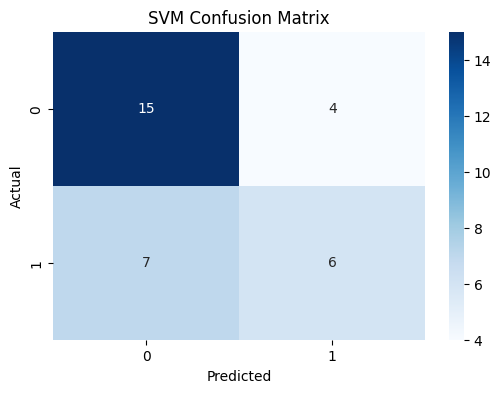

True Positives: 6
True Negatives: 15
False Positives: 7
False Negatives: 4


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_knn)

# Mendapatkan nilai True Positive, True Negative, False Positive, False Negative dari confusion matrix
TN = conf_matrix[0][0]
FP = conf_matrix[1][0]
FN = conf_matrix[0][1]
TP = conf_matrix[1][1]

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Menampilkan nilai True Positive, True Negative, False Positive, False Negative
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

# KNN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_sm, y_sm)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 100}
Skor terbaik: 81.59521137110616


# KNN ADS

In [ ]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X_ads, y_ads = ads.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_ads, y_ads)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 50}
Skor terbaik: 83.43399859943978


# KNN TL

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_tl, y_tl)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 25}
Skor terbaik: 76.96684215612251


# KNN RUS

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
# define params for tuning Naive Bayes
parameter = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'max_leaf_nodes': [3, 6, 9, None],
}

rf_improve = RandomForestClassifier()
rf_improve_gridSearch = GridSearchCV(rf_improve, parameter, cv=4, n_jobs=-1, verbose=1, scoring='f1_macro')
rf_improve_gridSearch.fit(X_rus, y_rus)

# Menampilkan hyperparameter terbaik dan skor terbaik
print("Hyperparameter terbaik:", rf_improve_gridSearch.best_params_)
print("Skor terbaik:", rf_improve_gridSearch.best_score_ * 100)

Fitting 4 folds for each of 240 candidates, totalling 960 fits
Hyperparameter terbaik: {'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'n_estimators': 50}
Skor terbaik: 74.86242018850714


# Saving prepro

In [ ]:
# diimport dulu terrr semua depedencies nya terr
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
# prepro depedencies
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip3 install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# data cleansing
from IPython.utils import text
import string
import re #regex library
# Import word_tokennize & FreqDist from NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# Feature extraction packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# model algorithm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# # load data
# data = pd.read_csv('J2.csv')

# # preprocessing the data -> cleanse the data & convert feature dtype as a vector/numbers yagesya biar bisa dipahami sama mesinnya brok.
# data['Indikator'] = data['Indikator'].str.lower()
# pd.DataFrame(data['Indikator'])

# def data_clean(indikator) :
#   #remove tab. new line, and back slice
#   indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
#   #remove non ASCII (emoticon,dll)
#   indikator = indikator.encode('ascii', 'replace').decode('ascii')
#   #remove mention, link, hashtag
#   indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
#   #remove number
#   indikator = re.sub(r"\d+", "", indikator)
#   #remove punctuation
#   indikator = indikator.translate(str.maketrans("","",string.punctuation))
#   #remove whitespace leading & trailing
#   indikator =  indikator.strip()
#   #remove multiple white spacew into single white space
#   indikator = re.sub('\s+', ' ', indikator)
#   #remove single char
#   indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

#   return indikator
# data['Indikator_clean'] = data['Indikator'].apply(data_clean)
#   #NLTK word tokenize
# def word_tokenize_wrapper(indikator) :
#   return word_tokenize(indikator)

# data['Indikator_tokens'] = data['Indikator_clean'].apply(word_tokenize_wrapper)

# normalizad_word = pd.read_csv("normalisasi1.csv")

# normalizad_word_dict = {}

# for index, row in normalizad_word.iterrows():
#     if row[0] not in normalizad_word_dict:
#         normalizad_word_dict[row[0]] = row[1]

# def normalized_term(document):
#     return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

# data['Indikator_normalized'] = data['Indikator_tokens'].apply(normalized_term)

# stop_list = ["saya","akan","yang","dengan","jika"]

# def stopword_removal (indikator):
#   filtering = stop_list
#   x = []
#   data = []
#   def my_func (x) :
#     if x in filtering :
#       return False
#     else :
#       return True

#   fit = filter(my_func,indikator)
#   for x in fit :
#     data.append(x)
#   return data

# data['indikator_filter'] = data['Indikator_normalized'].apply(stopword_removal)

# # Stemming
# def stemming(indikator) :
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   do = []
#   for w in indikator :
#     dt = stemmer.stem(w)
#     do.append(dt)

#   data_clean = []
#   d_clean = " ".join(do)
#   print(d_clean)
#   return d_clean

# data['indikator_stemming'] = data['indikator_filter'].apply(stemming)

# #tokenize data stemming - NLTK word tokenize
# def stemmed_tokenizing(indikator) :
#   return word_tokenize(indikator)

# data['indikator_stemmed_tokens'] = data['indikator_stemming'].apply(stemmed_tokenizing)

# data_clean = data.astype({'Tipe' : 'category'})
# data_clean = data.astype({'indikator_stemmed_tokens' : 'string'})

# X = data_clean['indikator_stemmed_tokens']
# y = data_clean['Tipe']

# list_indikator = np.array(X)
# list_tipe = np.array(y)
# enc = LabelEncoder()
# list_tipe = enc.fit_transform(list_tipe)

# # Saving X
# !pip install joblib
# import joblib
# joblib.dump(list_indikator, 'X_J2.sav')

# # Saving y encode
# joblib.dump(list_tipe, 'y_J2.sav')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Saving prepro for testing

In [ ]:
# Load data
dt = pd.read_csv('test_J2.csv')

# casefolding
dt['Indikator'] = dt['Indikator'].str.lower()

# cleansing
def data_clean(indikator) :
  # remove tab. new line, and back slice
  indikator = indikator.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # remove non ASCII (emoticon,dll)
  indikator = indikator.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  indikator = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", indikator).split())
  # remove number
  indikator = re.sub(r"\d+", "", indikator)
  # remove punct
  indikator = indikator.translate(str.maketrans("","",string.punctuation))
  # remove whitespace leading & trailing
  indikator = indikator.strip()
  # remove multiple white spacew into single white space
  indikator = re.sub('\s+', ' ', indikator)
  # remove single char
  indikator = re.sub(r"\b[a-zA-Z]\b", "", indikator)

  return indikator

dt['Indikator'] = dt['Indikator'].apply(data_clean)

# Tokenizing
def word_tokenize_wrapper(indikator) :

  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(word_tokenize_wrapper)

# Normalization

normalized_list = pd.read_csv('normalisasi1.csv')
normalized_dict = {}

for index, row in normalized_list.iterrows() :
  if row[0] not in normalized_dict :
    normalized_dict[row[0]] = row[1]

def normalizer(indikator) :
  return [normalized_dict[term] if term in normalized_dict else term for term in indikator]

dt['Indikator'] = dt['Indikator'].apply(normalizer)

# filtering
stop_list = ["saya","akan","yang","dengan","jika"]

def stopword_removal (indikator):
  filtering = stop_list
  x = []
  data = []
  def my_func (x) :
    if x in filtering :
      return False
    else :
      return True

  fit = filter(my_func,indikator)
  for x in fit :
    data.append(x)
  return data

dt['Indikator'] = dt['Indikator'].apply(stopword_removal)

# Stemming
def stemming(indikator) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  do = []
  for w in indikator :
    dt = stemmer.stem(w)
    do.append(dt)

  data_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

dt['Indikator'] = dt['Indikator'].apply(stemming)

#tokenize data stemming - NLTK word tokenize
def stemmed_tokenizing(indikator) :
  return word_tokenize(indikator)

dt['Indikator'] = dt['Indikator'].apply(stemmed_tokenizing)



tegur dan contoh bagaimana benar
awal tegur memang sudah tegur kali kali tetap sama lapor pada guru sangkut karena hanya biar dan kita kerja tugas enak di dia
coba tanya cara pribadi apakah ada masalah buat pasirf tawar bantu dan dukung agar kembali aktif tidak ada ubah tegur
tegur cara sopan dan ingat tentang penting kontribusi tiap anggota kelompok masih tidak ubah ambil aloh tugas
coba bicara dengan karena ingin tahu kendala dalam kerja tugas sebut dan bisa beri bantu
jujur orang tidak enak gamau ribet dan gamau ribut lebih pilih untuk selesai sendiri kalau negur dulu belum tentu dia sadar dan malah buang waktu
tegur dan bicara dengan untuk menannyakan kenapa dia tidak laku tanggung jawab untuk emngerjakan tugas tanya kepada apakah ada hal tidak ia mengertim bantu ia untuk bisa laku hal hal ia tidak paham
laku yaitu tegur karena ini rupa kelompok kerja bukan individual arti nilai sama rata untuk masing masing anggota
bakal tegur kenapa tegur karena kalau misal tidak di tegur dia sep

In [ ]:
dt.to_csv('J2_prepro.csv',index=False)

# eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import joblib
from imblearn.under_sampling import TomekLinks

ads = ADASYN()

# Load data X and y
X = joblib.load('X_J2.sav')
y = joblib.load('y_J2.sav')

# Initialize and fit CountVectorizer and TfidfTransformer
cntizer = CountVectorizer(analyzer="word", max_features=1000, min_df=0.01)
X_cnt = cntizer.fit_transform(X)

tfizer = TfidfTransformer()
X_tfidf = tfizer.fit_transform(X_cnt).toarray()
X = X_tfidf

# Load new data for prediction
dt = pd.read_csv('J2_prepro.csv')
df_test = dt['Indikator']
label = dt['Tipe']

# Transform the new data
my_X_cnt = cntizer.transform(df_test.values.astype('U'))
my_X_tfidf = tfizer.transform(my_X_cnt).toarray()

# Initialize the result list
result = []

# Train the model
X_ads, y_ads = ads.fit_resample(X, y)
model = RandomForestClassifier(max_depth=None, max_features='log2', max_leaf_nodes=None, n_estimators=50)
model.fit(X_ads, y_ads)
# Save the model
joblib.dump(model, 'clf_J2.sav')

# Predict the new data
y_pred = model.predict(my_X_tfidf)

# Convert predictions
for pred in y_pred:
    if pred == 0:
        result.append('F')
    else:
        result.append('T')

# Display the predictions
for i, res in enumerate(result):
    print(f"{res}")


T
F
F
F
F
F
T
T
T


In [ ]:
pd.DataFrame(label)

,Tipe
0,T
1,T
2,F
3,F
4,F
5,F
6,F
7,T
8,T


In [ ]:
pd.DataFrame(df_test)

,Indikator
0,"['tegur', 'dan', 'contoh', 'bagaimana', 'benar']"
1,"['awal', 'tegur', 'memang', 'sudah', 'tegur', ..."
2,"['coba', 'tanya', 'cara', 'pribadi', 'apakah',..."
3,"['tegur', 'cara', 'sopan', 'dan', 'ingat', 'te..."
4,"['coba', 'bicara', 'dengan', 'karena', 'ingin'..."
5,"['jujur', 'orang', 'tidak', 'enak', 'gamau', '..."
6,"['tegur', 'dan', 'bicara', 'dengan', 'untuk', ..."
7,"['laku', 'yaitu', 'tegur', 'karena', 'ini', 'r..."
8,"['bakal', 'tegur', 'kenapa', 'tegur', 'karena'..."
